In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns
from seaborn import load_dataset


In [6]:
# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [9]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)
 
# Using the formula to calculate m and c
numer = 0
denom = 0
for i in range(n):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
  m = numer / denom
  c = mean_y - (m * mean_x)
 
# Print coefficients
print(m, c)

0.26342933948939945 325.57342104944223


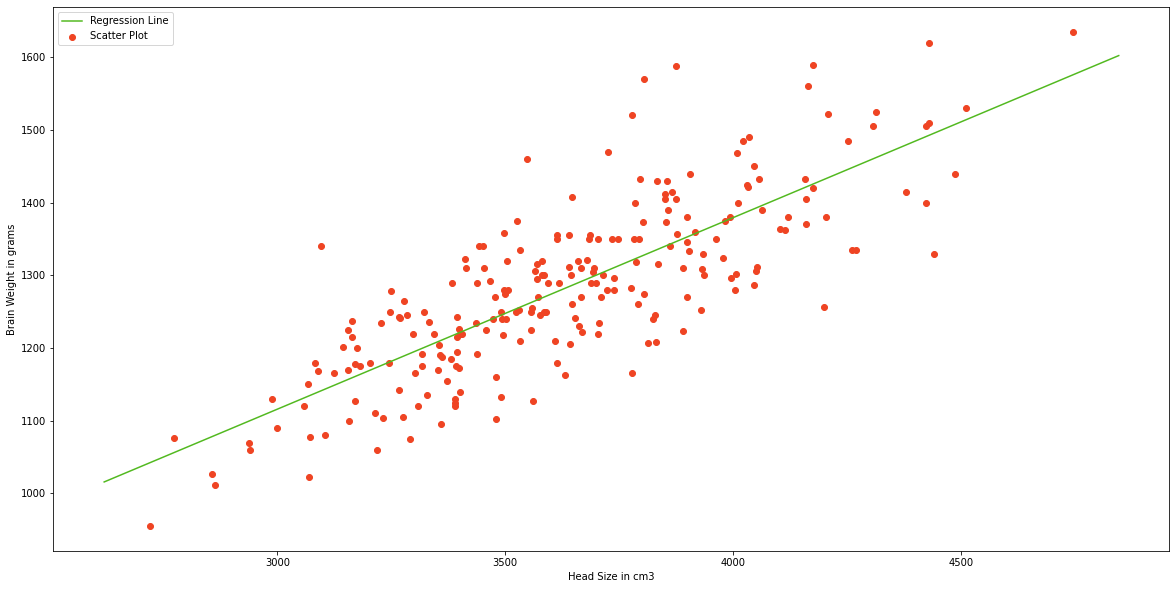

In [10]:
# Plotting Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x 
 
# Ploting Line
plt.plot(x, y, color='#52b920', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef4423', label='Scatter Plot')
 
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [15]:
#ss_t is the total sum of squares and ss_r is the total sum of squares of residuals(relate them to the formula).
ss_t = 0
ss_r = 0
for i in range(m):
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
  r2 = 1 - (ss_r/ss_t)

print(r2)

TypeError: ignored

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)

TypeError: ignored